In [3]:
import torch
from torch import nn
import torchvision 
from torchvision import models, transforms

import numpy as np
import argparse
from PIL import Image
import json
import pickle
import urllib.request as urllib2


In [8]:
image_size = 224
image_size=(image_size, image_size)
image_path = 'img1.jpg'

In [9]:
mappings = pickle.load(urllib2.urlopen('https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl') )

In [10]:
transform = transforms.Compose([            
     transforms.Resize(image_size),             
     transforms.ToTensor(),                     
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

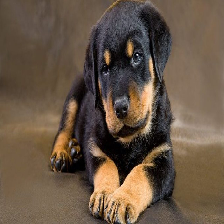

In [11]:
image=Image.open(image_path).resize(image_size)
image

In [12]:
img_t = transform(image)
image = torch.unsqueeze(img_t, 0)
image.shape

torch.Size([1, 3, 224, 224])

In [13]:
# First, load the model
resnet = models.resnet50(pretrained=True)

# Second, put the network in eval mode
resnet.eval()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\Himank Jerolia/.cache\torch\checkpoints\resnet50-19c8e357.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
# Carry out model inference
out = resnet(image)

# Forth, print the top 5 classes predicted by the model
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(mappings[idx.item()], percentage[idx].item()) for idx in indices[0][:5]]

[('Rottweiler', 95.23529815673828),
 ('Tibetan mastiff', 3.8928303718566895),
 ('black-and-tan coonhound', 0.4133107662200928),
 ('kelpie', 0.1353393942117691),
 ('Appenzeller', 0.06504979729652405)]

In [15]:
mappings[indices[0][0].item()]

'Rottweiler'